# 1. Understand the Odds Ratios:
The odds ratio (OR) quantifies how much more likely individuals exposed to a certain EDC are to develop CVD compared to those who are not exposed.
For example, an OR of 1.28 for polychlorinated biphenyls (PCBs) means that individuals exposed to PCBs are 1.28 times more likely to have CVD compared to unexposed individuals.
# 2. Simulate EDC Exposure:
You can simulate whether individuals are exposed to each EDC (e.g., PCBs, bisphenol A, etc.) as a binary variable (1 = exposed, 0 = not exposed). The prevalence of exposure to each EDC can be estimated or assumed based on real-world data (e.g., 20-30% of people exposed to each chemical)

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# The baseline risk represents the probability of the target outcome (e.g., cardiovascular disease, CVD) in the unexposed or general population before considering the effect of the specific risk factor (EDC exposure). This baseline is crucial for accurately adjusting the risk based on odds ratios.

In [2]:
# Assuming the existing dataframe is called existing_df and has 70,000 rows
# Let's assume 'existing_df' already exists
num_samples = df.shape[0]

# Simulate exposure to each EDC (binary: 1 = exposed, 0 = not exposed)
pcb_exposure = np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])  # 30% exposed to PCBs
bpa_exposure = np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])  # 30% exposed to BPA
organochlorine_pesticide_exposure = np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2])  # 20% exposed
phthalate_exposure = np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2])  # 20% exposed

# Define the odds ratios for each EDC exposure
odds_ratios = {
    'pcb': 1.28, # polychlorinated biphenyl  (OR=1.28; 95%CI: 1.17–1.39)
    'bpa': 1.19, #  bisphenol   (OR=1.19, 95% CI: 1.03–1.37)
    'organochlorine_pesticide': 1.12, # organo-chlorine pesticide  (OR=1.12, 95% CI: 1.00–1.24)
    'phthalate': 1.11, # (OR=1.11, 95% CI: 1.06–1.17)
    'testvalue' : 5
}

# Assume a baseline CVD risk for unexposed individuals (10%)
baseline_cvd_risk = 0.10 # ----> research necessary

# Function to calculate adjusted CVD risk based on odds ratio
def calculate_adjusted_risk(odds_ratio, baseline_risk):
    return (odds_ratio * baseline_risk) / (1 + (odds_ratio - 1) * baseline_risk)

# Calculate adjusted CVD risk for each exposure type
pcb_cvd_risk = np.where(pcb_exposure == 1, calculate_adjusted_risk(odds_ratios['pcb'], baseline_cvd_risk), baseline_cvd_risk)
bpa_cvd_risk = np.where(bpa_exposure == 1, calculate_adjusted_risk(odds_ratios['bpa'], baseline_cvd_risk), baseline_cvd_risk)
organochlorine_pesticide_cvd_risk = np.where(organochlorine_pesticide_exposure == 1, calculate_adjusted_risk(odds_ratios['organochlorine_pesticide'], baseline_cvd_risk), baseline_cvd_risk)
phthalate_cvd_risk = np.where(phthalate_exposure == 1, calculate_adjusted_risk(odds_ratios['phthalate'], baseline_cvd_risk), baseline_cvd_risk)

# Simulate CVD outcome (binary: 1 = CVD, 0 = no CVD) based on adjusted risk for each exposure
pcb_cvd_outcome = np.random.rand(num_samples) < pcb_cvd_risk
bpa_cvd_outcome = np.random.rand(num_samples) < bpa_cvd_risk
organochlorine_pesticide_cvd_outcome = np.random.rand(num_samples) < organochlorine_pesticide_cvd_risk
phthalate_cvd_outcome = np.random.rand(num_samples) < phthalate_cvd_risk

# Add these new features to the existing dataframe
df['polychlorinated_biphenyls'] = pcb_cvd_outcome.astype(int)
df['bisphenol_a'] = bpa_cvd_outcome.astype(int)
df['organochlorine_pesticide'] = organochlorine_pesticide_cvd_outcome.astype(int)
df['phthalate'] = phthalate_cvd_outcome.astype(int)

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,polychlorinated_biphenyls,bisphenol_a,organochlorine_pesticide,phthalate
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0,0,0,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0,0,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         70000 non-null  int64  
 1   age                        70000 non-null  int64  
 2   gender                     70000 non-null  int64  
 3   height                     70000 non-null  int64  
 4   weight                     70000 non-null  float64
 5   ap_hi                      70000 non-null  int64  
 6   ap_lo                      70000 non-null  int64  
 7   cholesterol                70000 non-null  int64  
 8   gluc                       70000 non-null  int64  
 9   smoke                      70000 non-null  int64  
 10  alco                       70000 non-null  int64  
 11  active                     70000 non-null  int64  
 12  cardio                     70000 non-null  int64  
 13  polychlorinated_biphenyls  70000 non-null  int

-1.670886075949367
testvalue
Oddratio :  4
Relative Risk:  1.82
diseased when exposed:  80.0 %
healthy when exposed:  20.0 %
pearson correlation:  0.33
Oddratio calculated:  16.18
Relative Risk calculated:  4.03


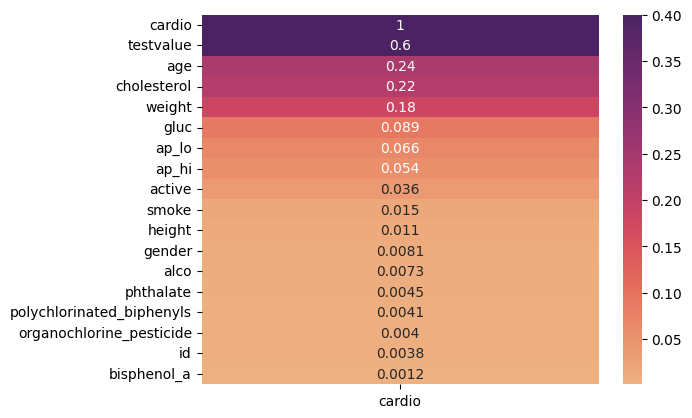

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the odds ratios for each EDC exposure
odds_ratios = {
    'pcb': 1.28, # polychlorinated biphenyl  (OR=1.28; 95%CI: 1.17–1.39)
    'bpa': 1.19, #  bisphenol   (OR=1.19, 95% CI: 1.03–1.37)
    'organochlorine_pesticide': 1.12, # organo-chlorine pesticide  (OR=1.12, 95% CI: 1.00–1.24)
    'phthalate': 1.11, # (OR=1.11, 95% CI: 1.06–1.17)
    'testvalue' : 4
}

# Parameters
N = df.shape[0]  # Total population
col = 'testvalue'
OR = odds_ratios[col]  # Odds ratio
# Baselinerisk is the P(d|e)
PU = 0.4 # baseline risk of outcome in the unexposed group the natural chance of something happening without any extra influences. chatGPT: 30...50%?

ORU = PU / (1-PU)
p_d_e = (OR*ORU)**2 + OR*ORU
print(p_d_e/(1-p_d_e)/ORU)

print(col)
print('Oddratio : ', OR)

RR = OR / ((1-PU)+PU*OR)                                                                                              
print('Relative Risk: ', np.round(RR,2))

# diseased_when_exposed
dwe = OR/(OR+1) 
print('diseased when exposed: ', np.round(dwe*100,2),'%')

# healthy_when_exposed (or 1-dwe)
hwe = 1/(OR+1) 
print('healthy when exposed: ', np.round(hwe*100,2),'%')
np.random.seed(42)  # For reproducibility


pearsoncorr = (np.sqrt(OR)-1) / (np.sqrt(OR)+1)
print('pearson correlation: ', np.round(pearsoncorr, 2))

df[col] = 0

# Generate random values for both diseased and healthy groups
# Fill the 'pcb' column for cardio == 1 and cardio == 0
df.loc[df['cardio'] == 1, col] = np.random.choice([0, 1], size=(df['cardio'] == 1).sum(), p=[1-dwe, dwe])  # for cardio == 1
df.loc[df['cardio'] == 0, col] = np.random.choice([0, 1], size=(df['cardio'] == 0).sum(), p=[1-hwe, hwe])  # for cardio == 0

# calculatec oddratio of the calculated data, should match the oddratio of the input... 
cm = confusion_matrix(df['cardio'], df[col])
a = cm[0][0]
b = cm[0][1]
c = cm[1][0]
d = cm[1][1]
OR_calc = (a * d) / (b * c) if b != 0 and c != 0 else np.nan
print('Oddratio calculated: ',np.round(OR_calc,2))

RR_calc = (a / (a+b)) / (c / (c+d))
print('Relative Risk calculated: ',np.round(RR_calc,2))


sns.heatmap(df.corr().abs()[['cardio']].sort_values(by='cardio', ascending=False), cmap = 'flare', vmax = 0.4, annot = True)
plt.show()

In [6]:
# calculate baseline risk
OR = 1.11
bl = 0.4
1.11*(bl/(1-bl))

ORU = bl / (1-bl)
print(ORU)

ORE = OR * ORU
print(ORE)

print(ORE/ORU)

# More Risk when exposed:
p_d_e = ORE / (1+ORE)
print(p_d_e)

print(p_d_e - bl)

p_d_e = (OR*ORU)**2 + OR*ORU



0.6666666666666667
0.7400000000000001
1.11
0.42528735632183906
0.02528735632183904


# Part II with OR

In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv("cardio_train.csv", sep=";")
df.drop('id',axis=1,inplace = True)
df.age = np.round(df.age / 364.5)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.cardio.value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [9]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.height.describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [11]:
df['bmi'] = np.round(df['weight'] / (df['height']/100)**2,2)
df.sample(5)
df.bmi.describe()

count    70000.000000
mean        27.556545
std          6.091405
min          3.470000
25%         23.880000
50%         26.375000
75%         30.220000
max        298.670000
Name: bmi, dtype: float64

In [12]:
df[df['bmi']>298]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
12770,54.0,1,75,168.0,120,80,1,1,1,0,1,1,298.67


In [13]:
df = pd.get_dummies(df,columns = ['gluc','cholesterol'])
df.sample(5)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,gluc_1,gluc_2,gluc_3,cholesterol_1,cholesterol_2,cholesterol_3
9823,47.0,2,161,62.0,120,80,0,0,1,0,23.92,True,False,False,True,False,False
64370,52.0,1,175,75.0,120,80,0,0,0,0,24.49,True,False,False,True,False,False
17211,52.0,2,178,70.0,150,80,0,0,1,1,22.09,True,False,False,True,False,False
7579,62.0,1,170,70.0,120,80,0,0,1,0,24.22,True,False,False,True,False,False
14086,57.0,2,173,86.0,120,80,0,0,1,0,28.73,True,False,False,True,False,False


In [14]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.410400,1.349571,164.359229,74.205690,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700,27.556545
std,6.772566,0.476838,8.210126,14.395757,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003,6.091405
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,3.470000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,23.880000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,26.375000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,30.220000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,298.670000


phthalate
Oddratio:  1.11
TP(ED):  3822 FP(ND):  31157
FN(EH):  3442 TN(NH):  31579
Oddratio calculated:  1.13
difference in Oddratio:  0.0154


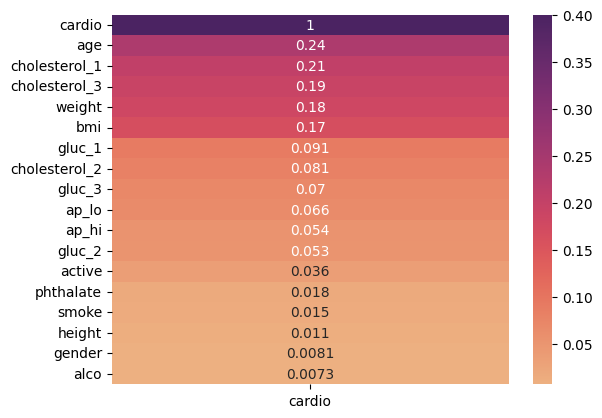

In [23]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)  # For reproducibility

# Define the odds ratios for each EDC exposure
odds_ratios = {
    'pcb': 1.28, # polychlorinated biphenyl  (OR=1.28; 95%CI: 1.17–1.39)
    'bpa': 1.19, #  bisphenol   (OR=1.19, 95% CI: 1.03–1.37)
    'organochlorine_pesticide': 1.12, # organo-chlorine pesticide  (OR=1.12, 95% CI: 1.00–1.24)
    'phthalate': 1.11, # (OR=1.11, 95% CI: 1.06–1.17)
    'testvalue' : 4
}

col = 'phthalate'

# Parameters
N = df.shape[0]  # Total population
OR = odds_ratios[col]  # Odds ratio
# Baselinerisk is the P(d|e)
bl = 0.1
# print('baselinerisk: ', bl)

# calculate baseline risk
ORU = bl / (1-bl)
ORE = OR * ORU

# More Risk when exposed:
p_d_e = ORE / (1+ORE)

print(col)
print('Oddratio: ', OR)
# print('risk by exposure: ', np.round(p_d_e, 2))

# RR = OR / ((1-bl)+bl * OR)                                                                                              
# print('Relative Risk: ', np.round(RR,2))

# exposed = 1
# bl = bl * exposed
# print('probability of disease when not exposured: ', bl)

# p_d_e = p_d_e * exposed
# print('probability of disease when exposured: ', p_d_e)

# Generate random values for both diseased and healthy groups
df[col] = 0
df.loc[df['cardio'] == 1, col] = np.random.choice([0, 1], size=(df['cardio'] == 1).sum(), p=[1-p_d_e, p_d_e])  # for cardio == 1
df.loc[df['cardio'] == 0, col] = np.random.choice([0, 1], size=(df['cardio'] == 0).sum(), p=[1-bl,       bl])  # for cardio == 0

# Exposed to the col
# exposed = 0.1
# df.loc[(df[col] == 1) & (df['cardio'] == 1), col] = np.random.choice([0, 1], size=((df[col] == 1) & (df['cardio'] == 1)).sum(), p=[1 - exposed, exposed])
# df.loc[(df[col] == 1) & (df['cardio'] == 0), col] = np.random.choice([0, 1], size=((df[col] == 1) & (df['cardio'] == 0)).sum(), p=[1 - exposed, exposed])

# Testing the accuracy of the algoritm: 

# calculatec oddratio of the calculated data, should match the oddratio of the input... 
cm = confusion_matrix(df[col],df['cardio'])
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print('TP(ED): ',TP, 'FP(ND): ', FP)
print('FN(EH): ',FN, 'TN(NH): ', TN)

OR_calc = (TP*TN)/(FP*FN) if TN != 0 and FN != 0 else np.nan
print('Oddratio calculated: ', np.round(OR_calc,2))
print('difference in Oddratio: ', np.round(OR_calc-OR,4))

RR_calc = (TP / (TP+FP)) / (FN / (FN+TN))
# print('Relative Risk calculated: ', np.round(RR_calc,2))
# print('Correlation: ',df.corr().abs()['cardio'][col])

sns.heatmap(df.corr().abs()[['cardio']].sort_values(by='cardio', ascending=False), cmap = 'flare', vmax = 0.4, annot = True)
plt.show()

In [16]:
((df['smoke'] == 0) & (df['cardio'] == 1)).sum()

32050

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            70000 non-null  float64
 1   gender         70000 non-null  int64  
 2   height         70000 non-null  int64  
 3   weight         70000 non-null  float64
 4   ap_hi          70000 non-null  int64  
 5   ap_lo          70000 non-null  int64  
 6   smoke          70000 non-null  int64  
 7   alco           70000 non-null  int64  
 8   active         70000 non-null  int64  
 9   cardio         70000 non-null  int64  
 10  bmi            70000 non-null  float64
 11  gluc_1         70000 non-null  bool   
 12  gluc_2         70000 non-null  bool   
 13  gluc_3         70000 non-null  bool   
 14  cholesterol_1  70000 non-null  bool   
 15  cholesterol_2  70000 non-null  bool   
 16  cholesterol_3  70000 non-null  bool   
 17  phthalate      70000 non-null  int64  
dtypes: boo

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df['active'],df['cardio'])
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
# print('TP(ED): ',TP, 'FP(ND): ', FP)
# print('FN(EH): ',FN, 'TN(NH): ', TN)
OR_calc = (TP*TN)/(FP*FN) if TN != 0 and FN != 0 else np.nan
print('Oddratio of Heartdisiease and Active: ',np.round(OR_calc,5))

Oddratio of Heartdisiease and Active:  0.83545


c:\Users\joell\anaconda3\envs\DTH\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


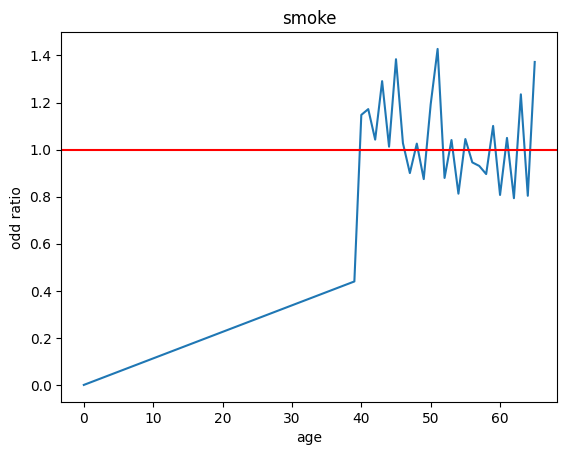

In [19]:
# Confusionmatrix
#  00 TN         01 FP
#  10 FN         11 TP

vals = df.age.value_counts().index.sort_values()
ploot = np.empty(shape =  [1, 2])

topic = 'smoke'

for nr, i in enumerate(vals):
    df_age = df[df.age == i]
    cm = confusion_matrix(df_age[topic],df_age['cardio'])
    if cm.shape == (2,2):
        TN = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TP = cm[1][1]
        # print('TP(ED): ',TP, 'FP(ND): ', FP)
        # print('FN(EH): ',FN, 'TN(NH): ', TN)
        OR_calc = (TP*TN)/(FP*FN) if TN != 0 and FN != 0 else np.nan
        # print('Age: ',i , 'Oddratio: ',OR_calc)
        ploot = np.append(ploot, [[i,OR_calc]], axis = 0)
plt.plot(ploot[:,0], ploot[:,1])
plt.xlabel('age')
plt.ylabel('odd ratio')
plt.title(topic)
plt.axhline(1, color = 'red')
plt.show()

Max BMI:  298
m:  0.0768078434292735 b:  23.454207645019416


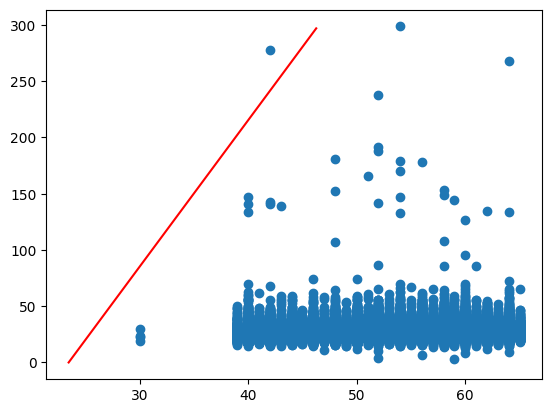

In [20]:
# Linear Regression between the numbers.
topic = 'bmi'
y = np.empty([1, df.bmi.max().astype(int)])
print('Max BMI: ',df.bmi.max().astype(int))
xbar = df['age'].mean()
ybar = df[topic].mean()

num = ((df[topic] - ybar)*(df['age']-xbar)).sum()
denum = ((df['age']-xbar)**2).sum()
m = num / denum
b = ybar - m*xbar
print('m: ',m, 'b: ',b)
for x in range(df.bmi.max().astype(int)):
    y[0,x] = m*x + b

plt.scatter(df.age, df.bmi)
plt.plot(y[0,:],range(df[topic].max().astype(int)), color = 'red')
plt.show()

In [21]:
# Confidence Intervall ?????
confidence = 0.95  # Confidence level

# Calculate the margin of error based on a binomial distribution
n = (df['cardio'] == 1).sum()
z = stats.norm.ppf(1 - (1 - confidence) / 2)  # Z-score for the confidence interval
margin_of_error = z * np.sqrt((p_d_e * (1 - p_d_e)) / n)

# Define lower and upper bounds for the interval
lower_bound = max(0, p_d_e - margin_of_error)
upper_bound = min(1, p_d_e + margin_of_error)

# Sample using a random probability within the confidence bounds
random_p_d_e = np.random.uniform(lower_bound, upper_bound)
sample = np.random.choice([0, 1], size=n, p=[1 - random_p_d_e, random_p_d_e])
print("Sample with confidence-adjusted probability:", sample)

Sample with confidence-adjusted probability: [1 0 0 ... 0 1 1]


In [22]:
# Pearson correlation
pearsoncorr = (np.sqrt(OR)-1) / (np.sqrt(OR)+1)
print('pearson correlation: ', np.round(pearsoncorr, 2))

pearson correlation:  0.03
